In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [ ]:
#   File Beer Profiles and ratings.csv
#   --------------------------------------

# This file contains 1 Tabs  with Beer profile and ratings info
    #   Name	Style	Brewery	Beer Name (Full)	Description	ABV	Min IBU	Max IBU	Astringency	Body	Alcohol	Bitter	Sweet	Sour	Salty	Fruits	Hoppy	Spices	Malty	review_aroma	review_appearance	review_palate	review_taste	review_overall	number_of_reviews



In [2]:
# Fetch raw data

rawdata = pd.read_csv(r'C:\Users\t.vincotte\Documents\CODE\TFE\EoF - Work\Beer_Profile\Source_Files\beer_profile_and_ratings.csv') 
 

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [5]:
rawdata.head(1)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497


In [6]:
rawdata.Description[0]

'Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored "alt" style beer notably well balanced.\\t'

NO TIME SERIES as aggregated reviews

In [8]:
#   Split dataset

cont_float_feature=rawdata.select_dtypes(float)
cont_int_features=rawdata.select_dtypes(int)
cat_feature= rawdata.select_dtypes(object)
cat_feature


,Name,Style,Brewery,Beer Name (Full),Description
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit..."
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al..."
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...
...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:


Moins de colonnes aue dans le detail = je suppose que beaucoup auront ete evaluees une seule fois
Beefull name est une colonne construite qui n'existe pas dans le dataset de detail

In [10]:
for col in cat_feature.columns:
    display(col)
    print('----------------')
    
    display(cat_feature[col].unique())
    display(cat_feature[col].value_counts())



'Name'

----------------


array(['Amber', 'Double Bag', 'Long Trail Ale', ...,
       'Red Nose Winter Ale', 'Fish Tale Winterfish',
       'Frosted Frog Christmas Ale - Barrel-Aged'], dtype=object)

Name
Oktoberfest                  12
Porter                       10
Smoked Porter                 9
Christmas Ale                 6
India Pale Ale                5
                             ..
Barleywine Style Ale          1
Lower De Boom Barleywine      1
Killer Penguin Barleywine     1
Great                         1
Organic Münster Alt           1
Name: count, Length: 3066, dtype: int64

'Style'

----------------


array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lager - American',

Style
Lager - Adjunct                    45
Lager - European Pale              43
Lambic - Fruit                     42
Stout - Irish Dry                  42
Wheat Beer - Hefeweizen            42
                                   ..
Bière de Champagne / Bière Brut     8
Lager - India Pale Lager (IPL)      6
IPA - New England                   4
Brett Beer                          3
Sour - Gose                         3
Name: count, Length: 111, dtype: int64

'Brewery'

----------------


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei GmbH / Zum Uerige',
       'Ninkasi Brewing Company', 'Widmer Brothers Brewing Company',
       'Southampton Publick House', 'The Olde Mecklenburg Brewery',
       'Brauerei Pinkus Mueller', 'Yazoo Brewing Company',
       'Free State Brewing Co.', 'Fordham Brewing Company',
       'Victory Brewing Company', "Mother's Brewing Company",
       'Rising Tide Brewing Company', 'Tuckerman Brewing Co.',
       'Hops & Grain', 'August Schell Brewing Company',
       'Privatbrauerei Frankenheim', 'Metropolitan Brewing',
       'Brauerei Diebels GmbH & Co KG', 'Mission Brewery',
       'Hövels Hausbrauerei', 'Evolution Craft Brewing Company',
       'Cheboygan Brewing Company', 'Les Trois Mousquetaires',
       'Driftwood Brewery', 'Rahr & Sons Brewing Company',
       'Grimm Brothers Brewhouse', "Beau's All Natural Brewing Company",
       'Buzzards Bay Brewing', 'Rush River Brewing Company',
       

Brewery
Boston Beer Company (Samuel Adams)    40
Dogfish Head Brewery                  31
Anheuser-Busch                        30
Three Floyds Brewing Co. & Brewpub    29
Victory Brewing Company               23
                                      ..
Sheepscot Valley Brewing Company       1
Shoreline Brewery And Restaurant       1
Isle Of Skye Brewery                   1
Brasseurs Illimités                    1
Privatbrauerei Frankenheim             1
Name: count, Length: 934, dtype: int64

'Beer Name (Full)'

----------------


array(['Alaskan Brewing Co. Alaskan Amber',
       'Long Trail Brewing Co. Double Bag',
       'Long Trail Brewing Co. Long Trail Ale', ...,
       "Natty Greene's Pub & Brewing Co. Red Nose Winter Ale",
       'Fish Brewing Company / Fishbowl Brewpub Fish Tale Winterfish',
       "Hoppin' Frog Brewery Barrel Aged Frosted Frog Christmas Ale"],
      dtype=object)

Beer Name (Full)
Hoppin' Frog Brewery Barrel Aged Frosted Frog Christmas Ale             1
Alaskan Brewing Co. Alaskan Amber                                       1
Long Trail Brewing Co. Double Bag                                       1
Long Trail Brewing Co. Long Trail Ale                                   1
Uerige Obergärige Hausbrauerei GmbH / Zum Uerige Uerige Doppelsticke    1
                                                                       ..
Buzzards Bay Brewing Moby D                                             1
Rush River Brewing Company Über Alt                                     1
Brauerei Im Füchschen Im Füchschen Alt                                  1
O'Fallon Brewery Sticke It To The Man                                   1
Blue Mountain Brewery Evan Altmighty                                    1
Name: count, Length: 3197, dtype: int64

'Description'

----------------


array(['Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored "alt" style beer notably well balanced.\\t',
       'Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\\t',
       'Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yea

Description
Notes:                                                                                                                                                                                                                                                                                                                                                                                                                          1347
Notes:21 IBU\t                                                                                                                                                                                                                                                                                                                                                                                                                     3
Notes:22 IBU\t                                                                                                                                    

Outcome of unique and value counts
-----------------------------------

Full name and description - leaf level
Analysis possible per name (label), style, brewery



In [11]:
cont_float_feature.info()
cont_int_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ABV                3197 non-null   float64
 1   review_aroma       3197 non-null   float64
 2   review_appearance  3197 non-null   float64
 3   review_palate      3197 non-null   float64
 4   review_taste       3197 non-null   float64
 5   review_overall     3197 non-null   float64
dtypes: float64(6)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Min IBU            3197 non-null   int64
 1   Max IBU            3197 non-null   int64
 2   Astringency        3197 non-null   int64
 3   Body               3197 non-null   int64
 4   Alcohol            3197 non-null   int64
 5   Bitter             3197 non-null  

In [12]:
cont_float_feature

,ABV,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,5.3,3.498994,3.636821,3.556338,3.643863,3.847082
1,7.2,3.798337,3.846154,3.904366,4.024948,4.034304
2,5.0,3.409814,3.667109,3.600796,3.631300,3.830239
3,8.5,4.148098,4.033967,4.150815,4.205163,4.005435
4,7.2,3.625000,3.973958,3.734375,3.765625,3.817708
...,...,...,...,...,...,...
3192,8.8,4.125000,3.875000,3.875000,3.750000,4.000000
3193,6.0,3.950000,3.750000,3.760000,3.790000,3.730000
3194,6.8,3.576923,3.711538,3.596154,3.673077,3.711538
3195,7.5,3.902299,3.885057,3.862069,3.902299,3.879310


Outcome of float
    ABV - % of alcohol in beer
    Review columns > ratings


In [13]:
cont_int_features

,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,number_of_reviews
0,25,50,13,32,9,47,74,33,0,33,57,8,111,497
1,25,50,12,57,18,33,55,16,0,24,35,12,84,481
2,25,50,14,37,6,42,43,11,0,10,54,4,62,377
3,25,50,13,55,31,47,101,18,1,49,40,16,119,368
4,25,50,25,51,26,44,45,9,1,11,51,20,95,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,35,50,15,37,24,35,46,19,0,23,45,67,74,4
3193,35,50,15,31,23,16,54,43,0,54,14,140,58,50
3194,35,50,8,44,24,19,52,21,0,26,21,96,77,26
3195,35,50,11,36,50,70,72,59,0,81,110,18,73,87


Integer
(File descriptor simplified) - count words
    Tab Mouthfeel       - Astringency	Body	Alcohol	- 
    Tab Taste           -   Bitter	Sweet	Sour	Salty	
    Tab Favor Aroma    -   Fruits	Hoppy	Spices	Malty
IBU, MIN and IBU Max - measures
Number of reviews for the beer          - can be aggregated 



In [ ]:
#   GRAPHS
#   -------------


In [14]:
FIGSIZE = (6,7)    # Taille figure en pouce - utlise dans tous les graphes
FIGSIZE2 = (3,4)

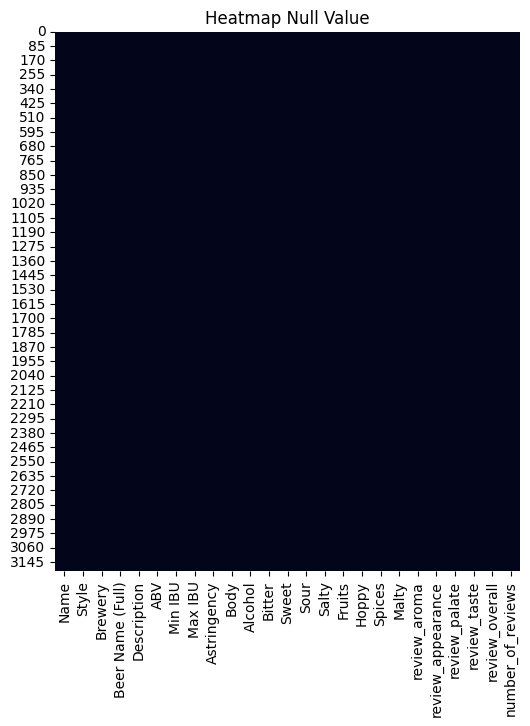

In [15]:
#   Repérer s'il y a des NULL et leur distribution / localisation
#   ---------------------------------------------------------------
plt.figure(figsize=FIGSIZE)         # Fonction figure > declarer figure dans laquelle je vais travailler
plt.title('Heatmap Null Value')     #   Titre de la figure
sns.heatmap(rawdata.isna(),cbar=False)      # Utilise graphique heatmap de seaborn dans matlpotlib / 
                                            #   isna nous dnne un masque boleen
plt.show()

No NULL values in beer profiles and ratings

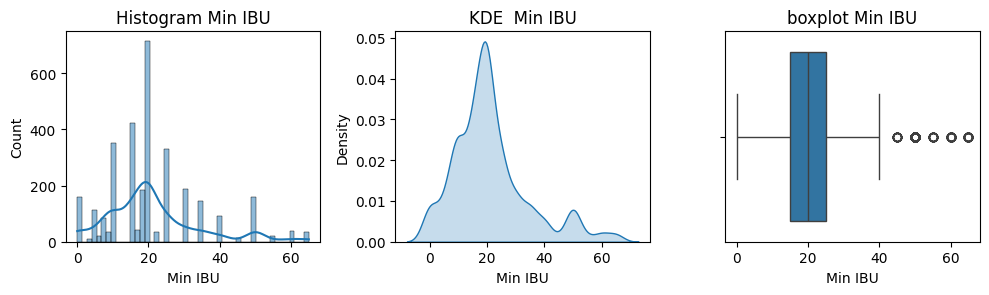

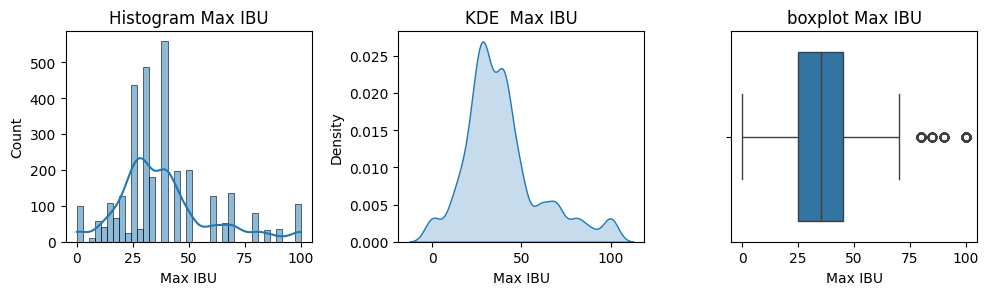

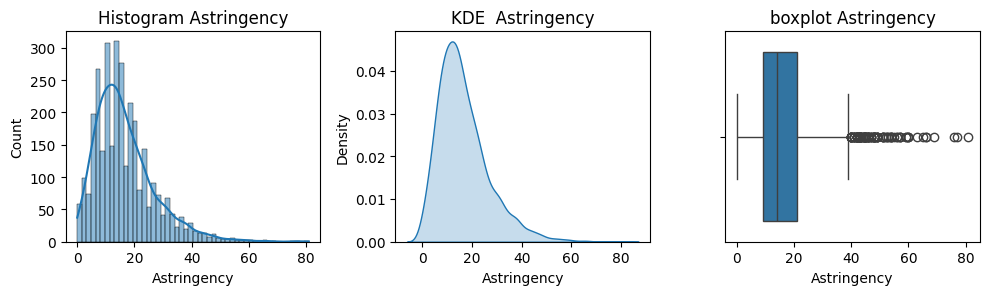

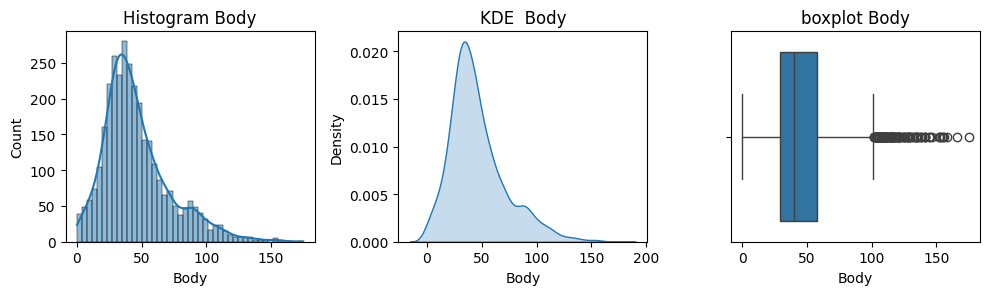

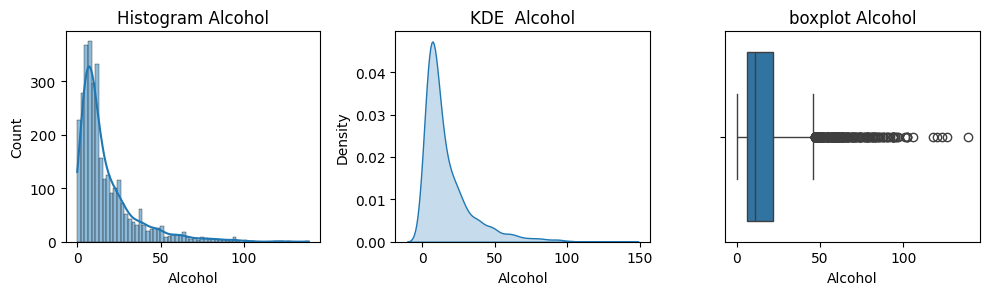

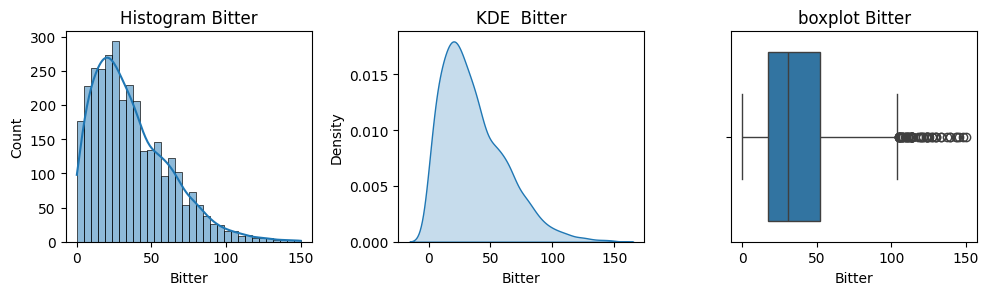

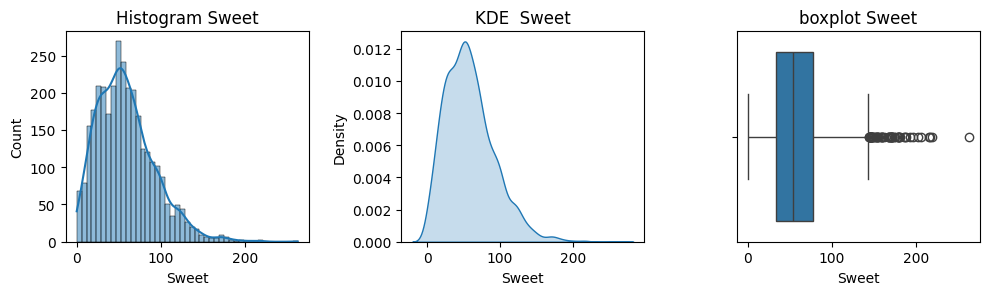

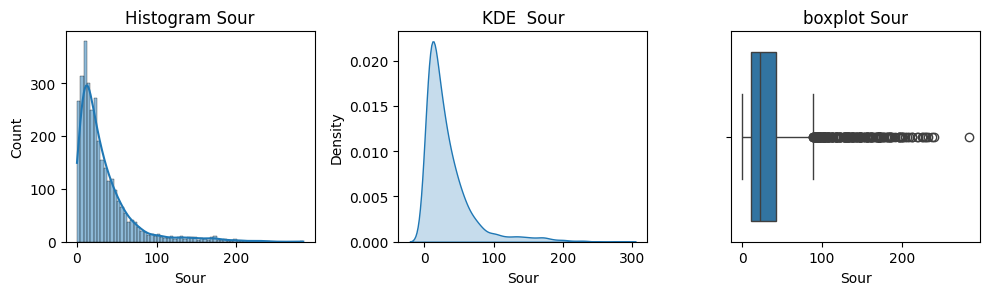

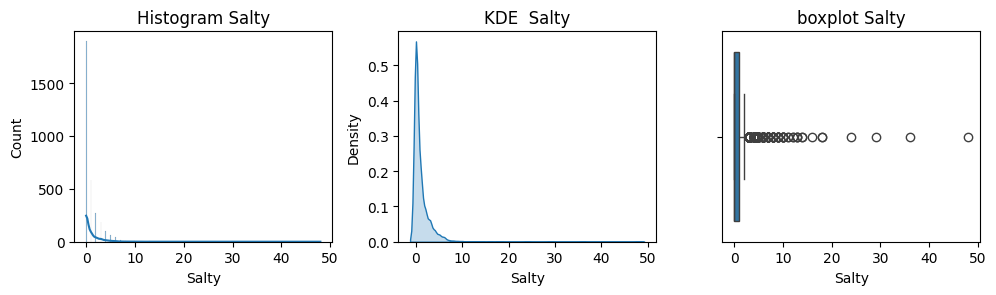

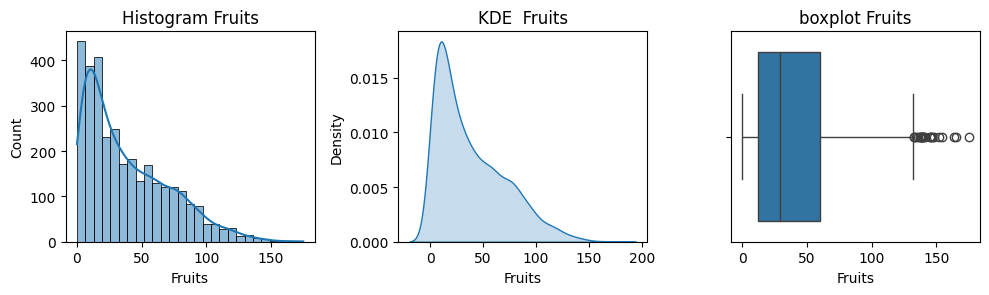

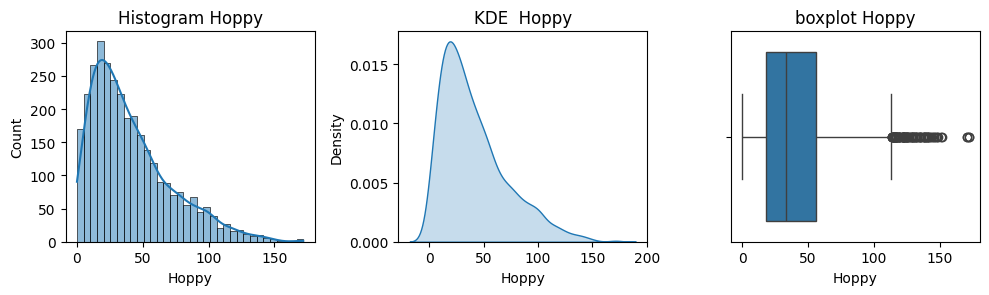

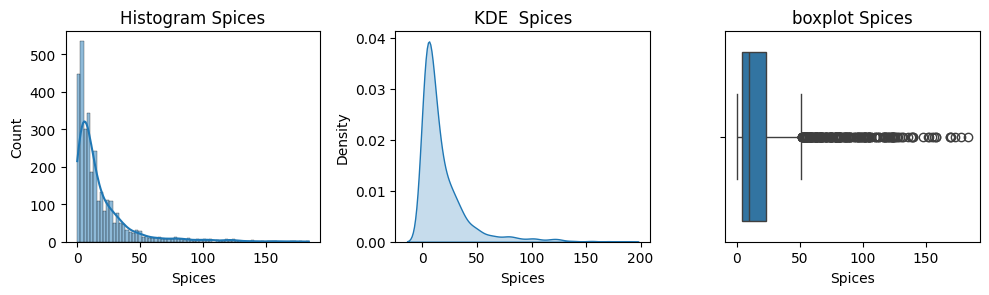

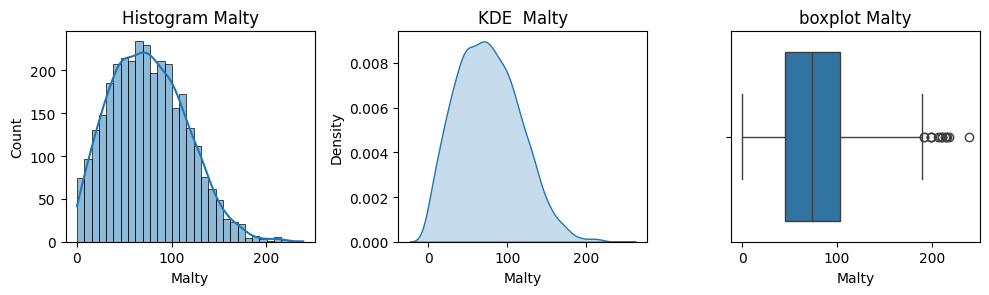

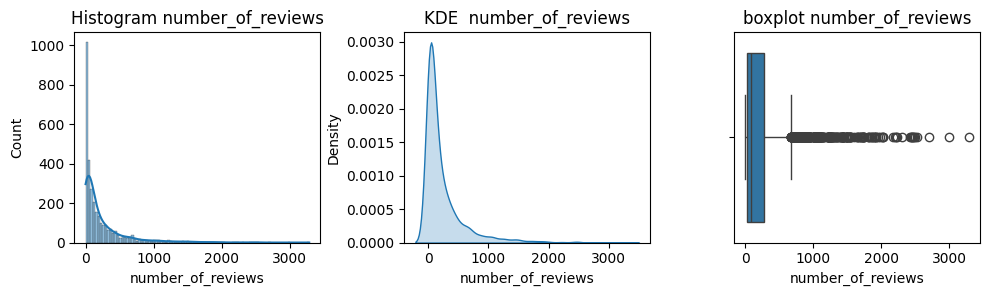

In [ ]:
#   Analyser continuous features - profile infos
#   ==========================================

X_continuous = rawdata[['Body','Bitter','Alcohol']] 

for i, col in enumerate(cont_int_features):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 

Meme configuration d'histogrammes et d'outliers que dans le fichier de detail

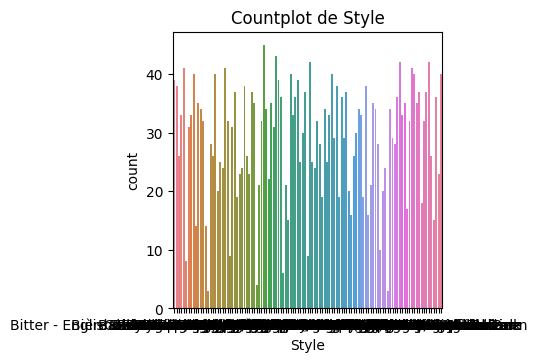

C:\Users\t.vincotte\AppData\Local\Temp\ipykernel_13656\3717953213.py:11: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\t.vincotte\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


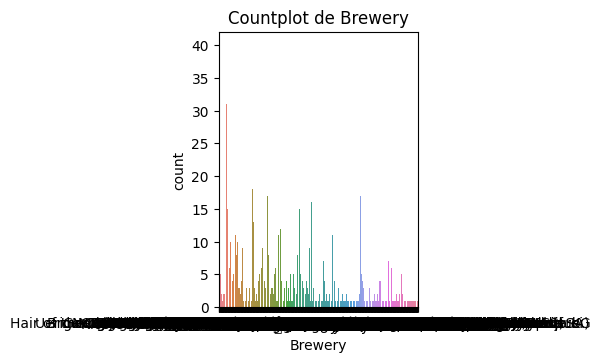

In [17]:
#   Graphes sur variables catégorielles > distribution
#   -----------------------------------------------------

X_discrete = rawdata[['Style','Brewery']] 
 
for i, col in enumerate(X_discrete):                     
    plt.figure(figsize=(12,10))
    plt.subplot(3,3,1)
    plt.title(f'Countplot de {col}')
    sns.countplot(data=rawdata,x=col,hue=col)
    plt.tight_layout() 
    plt.show() 



Infos profils semblables dans profile and rating et details

In [ ]:
rawdata.count()

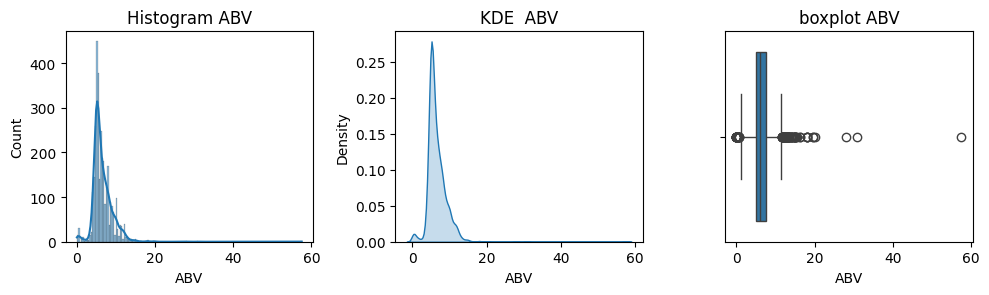

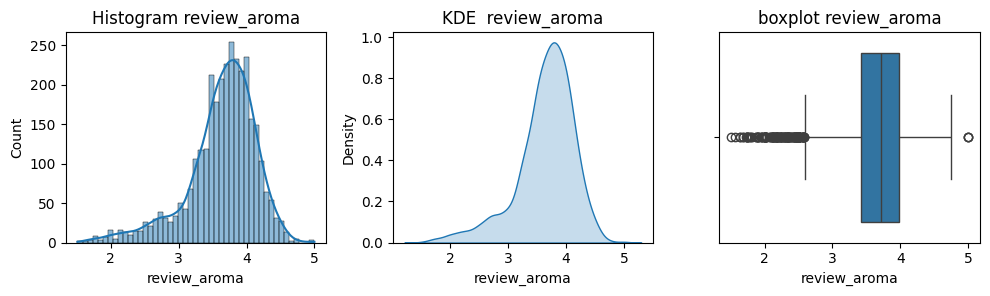

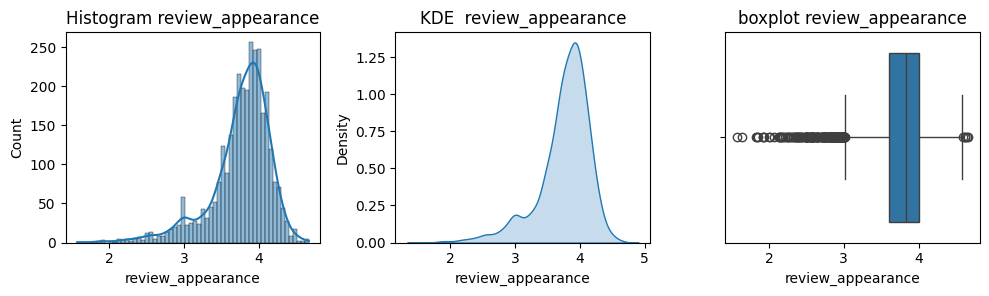

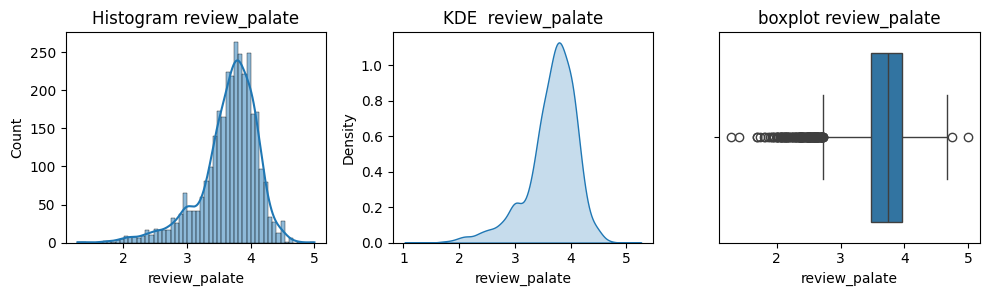

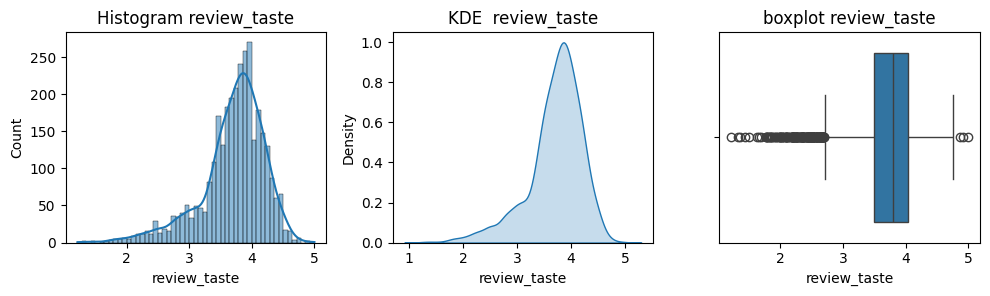

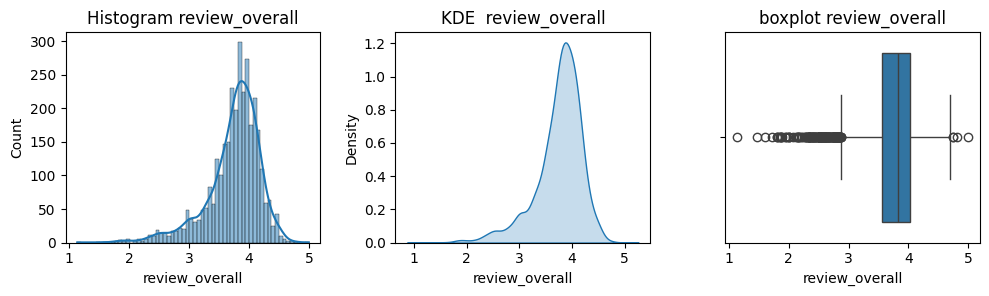

In [ ]:
#   Analyser continuous features - reviews
#   ==========================================

for i, col in enumerate(cont_float_feature):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 


Reviews plutot vers la droite - a comparer au fichier des reviews